In this notebook, I will create a time elapse of amount of dms in the water for the top 3 GRU's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
G_hydro_1 = pd.read_excel('y_LowerOIrangeEvW_OrigFile.xlsx','y_LowerOIrangeEvW_OrigFile')

In [3]:
# I will only use these following columns
# total number of columns: 22
df = G_hydro_1[[             'Drainage Region Name',
                             'Sample Start Date',
                             'DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result'
               ]]

In [4]:
# Define the mapping between drainage regions and resource units 23 GRU's
resource_units = {
    'GRU1': ['D71A','D71C','D71D','D72A','D72B','D73B','D72C','D73C','D73D','D73E','D73F'],
    
    'GRU2': ['D81A','D81B','D81D','D81E','D81F','D81G'],
    
    'GRU3': ['D82A','D82B','D82C','D82D',],
    
    'GRU4.1': ['D82E','D82F','D82G','D82H','D82J','D82K','D82L'],
    
    'GRU4.2': ['F10A','F10B','F10C','F20C','F20D','F20E'],
    
    'GRU6.1': ['D61A','D61B','D61C','D61D','D61E','D61F','D61G','D61H','D62C','D62D'],
    
    'GRU6.2': ['D61J','D61K','D61L','D61M','D62A','D62B','D62E','D62F'],
    
    'GRU6.3': ['D62H','D62G','D62J'],
    
    'GRU7.1': ['D51B','D51C','D52C','D55A','D55B','D55C','D55D','D55E','D55G','D55K','D56D','D56F','D56G','D56H','D56J'],
    
    'GRU7.2': ['D54A','D54B','D54C','D55F','D55H','D55J','D55L','D52D','D52E','D52F','D58A'],
    
    'GRU7.3': ['D53F','D54D','D54F','D57D'],
    
    'GRU7.4': ['D51A','D52A','D52B','D56A','D56B','D56C','D56E'],
    
    'GRU7.5': ['D54E','D55M','D57A','D57B','D57C','D58B','D58C'],
    
    'GRU7.6': ['D53D','D53G','D54G','D57E'],
    
    'GRU7.7': ['D53A','D53B','D53C','D53E','D53H','D53J'],
    
    'GRU8.1': ['F30A','F30B','F30C','F30D','F30E'],
    
    'GRU8.2': ['F40B','F40C','F40E','F40G','F50A','F50B','F50C','F50E','F50F','F20A','F20B','F20B','F20B','F30F','F30G'],
    
    'GRU8.3': ['F40A','F40D','F40F','F40H','F50G','F60A','F60B','F60C','F60D','F60E'],
    
    'GRU9.1': ['D41B','D41C','D41D','D41E','D41F','D41H','D41M'],
    
    'GRU9.2': ['D41G','D41L','D41J','D41K'],
    
    'GRU9.3': ['D71B','D73A'],
    
    'GRU10.1': ['D42A','D42B','D42C','D42D'],
    
    'GRU10.2': ['D42E','D81C']
}

# Create a new column 'resource_unit'
df['resource_unit'] = None

# Populate the 'resource_unit' column
def get_resource_unit(drainage_region):
    for ru, regions in resource_units.items():
        if drainage_region in regions:
            return ru
    return None

df['resource_unit'] = df['Drainage Region Name'].apply(get_resource_unit)

C:\Users\ettie\AppData\Local\Temp\ipykernel_17012\1190158480.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resource_unit'] = None
C:\Users\ettie\AppData\Local\Temp\ipykernel_17012\1190158480.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resource_unit'] = df['Drainage Region Name'].apply(get_resource_unit)


In [5]:
df = df.dropna()

In [6]:
df_GRU6_1 = df[df['resource_unit']=='GRU6.1']

In [18]:
# Sort data by date
df_GRU6_1 = df_GRU6_1.sort_values(by='Sample Start Date')

# Extract dates and TDS values
dates = df_GRU6_1['Sample Start Date']
dms_values = df_GRU6_1['DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result']
dates_converted = pd.to_datetime(dates)

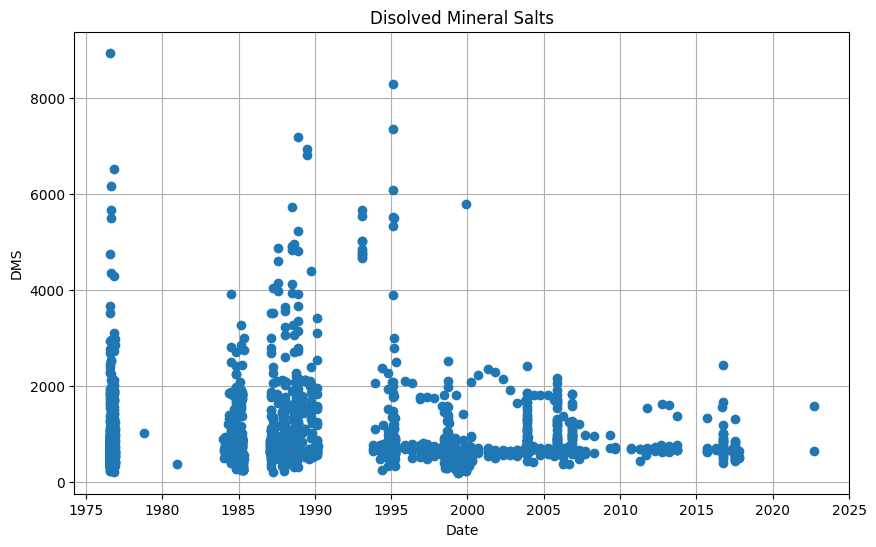

In [20]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(dates_converted, dms_values, marker='o', linestyle='')
plt.xlabel('Date')
plt.ylabel('DMS')
plt.title('Disolved Mineral Salts over time for GRU 6.1')
plt.grid(True)
plt.show()

In [45]:
df_GRU10_1 = df[df['resource_unit']=='GRU10.1']  

In [46]:
# Sort data by date
df_GRU10_1 = df_GRU10_1.sort_values(by='Sample Start Date')

# Extract dates and TDS values
dates = df_GRU10_1['Sample Start Date']
dms_values = df_GRU10_1['DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result']
dates_converted = pd.to_datetime(dates)

In [47]:
df_GRU10_1['moving_average'] = dms_values.rolling(window=7, min_periods=7).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


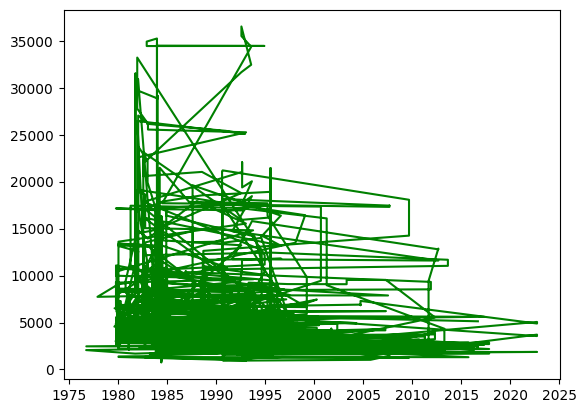

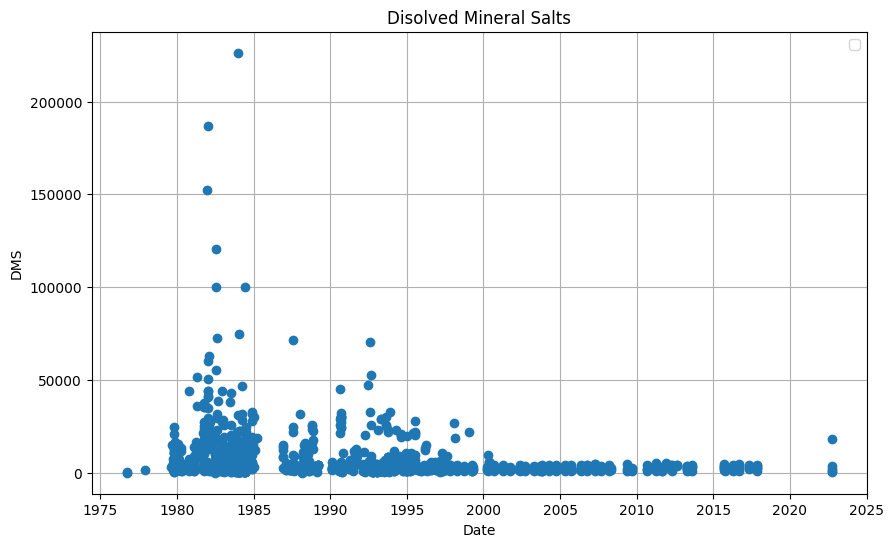

In [51]:
# Plot trendline
#plt.plot(x_trendline, y_trendline, color='red', linestyle='--', label='Trendline')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(dates_converted, dms_values, marker='o', linestyle='')
plt.xlabel('Date')
plt.ylabel('DMS')
plt.title('Disolved Mineral Salts for GRU 10.1') 
plt.grid(True)
plt.legend()
plt.show()

In [24]:
df_GRU7_1 = df[df['resource_unit']=='GRU7.1'] 

In [25]:
# Sort data by date
df_GRU7_1 = df_GRU7_1.sort_values(by='Sample Start Date')

# Extract dates and TDS values
dates = df_GRU7_1['Sample Start Date']
dms_values = df_GRU7_1['DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result']
dates_converted = pd.to_datetime(dates)

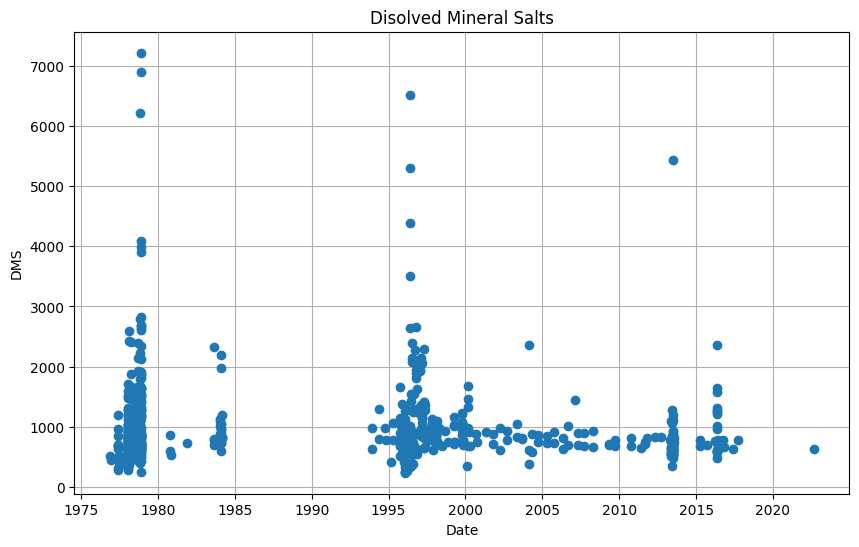

In [26]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(dates_converted, dms_values, marker='o', linestyle='')
plt.xlabel('Date')
plt.ylabel('DMS')
plt.title('Disolved Mineral Salts')
plt.grid(True)
plt.show()